In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm ,skew,kurtosis
from sklearn.preprocessing import StandardScaler

In [102]:
df_train=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_train.csv')

In [103]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 2.0 GB


In [104]:
c_int=df_train.select_dtypes(include=['int64']).apply(pd.to_numeric,downcast='unsigned')
c_float=df_train.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')


In [105]:
o_df=pd.concat([c_int,c_float],axis=1)

In [106]:
column_type=dict(o_df.dtypes.copy())

In [107]:
# column_type

{'avg_online_minutes': dtype('float32'),
 'bd_barrack_level': dtype('uint8'),
 'bd_dolmen_level': dtype('uint8'),
 'bd_guest_cavern_level': dtype('uint8'),
 'bd_hall_of_war_level': dtype('uint8'),
 'bd_healing_lodge_level': dtype('uint8'),
 'bd_healing_spring_level': dtype('uint8'),
 'bd_hero_gacha_level': dtype('uint8'),
 'bd_hero_pve_level': dtype('uint8'),
 'bd_hero_strengthen_level': dtype('uint8'),
 'bd_magic_coin_tree_level': dtype('uint8'),
 'bd_market_level': dtype('uint8'),
 'bd_outpost_portal_level': dtype('uint8'),
 'bd_stronghold_level': dtype('uint8'),
 'bd_training_hut_level': dtype('uint8'),
 'bd_warehouse_level': dtype('uint8'),
 'bd_watchtower_level': dtype('uint8'),
 'building_acceleration_add_value': dtype('uint32'),
 'building_acceleration_reduce_value': dtype('uint32'),
 'cavalry_add_value': dtype('uint32'),
 'cavalry_reduce_value': dtype('uint32'),
 'general_acceleration_add_value': dtype('uint32'),
 'general_acceleration_reduce_value': dtype('uint32'),
 'infantry

In [108]:
len(column_type)

108

In [109]:
del o_df,c_int,c_float,df_train

In [110]:
data_train=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_train.csv',
                      dtype=column_type,parse_dates=['register_time'],infer_datetime_format=True)

data_test=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_test.csv',
                      dtype=column_type,parse_dates=['register_time'],infer_datetime_format=True)

In [111]:
data_train.rename(columns={'treatment_acceleraion_add_value':'treatment_acceleration_add_value',\
                          'sr_rss_a_prod_levell':'sr_rss_a_prod_level'} ,inplace=True)

data_test.rename(columns={'treatment_acceleraion_add_value':'treatment_acceleration_add_value',\
                          'sr_rss_a_prod_levell':'sr_rss_a_prod_level'} ,inplace=True)

In [112]:
data_train.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [113]:
data_test.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,2018-03-08 20:27:57,166415.0,138362.0,0.0,0.0,0.0,0.0,258522.0,90142.0,...,0,0,0,0,1,1,1,8.000000,0.0,0
1,14934,2018-03-08 20:29:42,10000.0,600.0,0.0,0.0,0.0,0.0,10000.0,400.0,...,0,0,0,0,0,0,0,0.166667,0.0,0
2,14935,2018-03-08 20:30:13,10000.0,3700.0,0.0,0.0,0.0,0.0,10000.0,2000.0,...,0,0,0,0,0,0,0,17.000000,0.0,0
3,14936,2018-03-08 20:31:41,210000.0,0.0,200000.0,0.0,200000.0,0.0,610000.0,0.0,...,0,0,0,0,0,0,0,1.666667,0.0,0
4,14937,2018-03-08 20:32:07,11500.0,3700.0,0.0,0.0,0.0,0.0,11000.0,2000.0,...,0,0,0,0,0,0,0,0.333333,0.0,0


In [114]:
data_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: datetime64[ns](1), float32(13), uint16(8), uint32(21), uint8(66)
memory usage: 493.1 MB


In [115]:
data_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 108 entries, user_id to pay_count
dtypes: datetime64[ns](1), float32(12), uint16(8), uint32(21), uint8(66)
memory usage: 175.5 MB


In [140]:
# data_label=data_train['prediction_pay_price']
# data_train2=data_train.drop(labels=['user_id','register_time'],axis=1)
# data_test2=data_test.drop(labels=['user_id','register_time'],axis=1)

data_train2=data_train.drop(labels=['register_time'],axis=1)
data_test2=data_test.drop(labels=['register_time'],axis=1)

In [171]:
train_7pay=data_train2[data_train2['pay_price']>0].copy()
test_7pay=data_test2[data_test2['pay_price']>0].copy()



In [172]:
# plt.scatter(train_7pay.ivory_reduce_value,train_7pay.prediction_pay_price)
# plt.show()

In [173]:
# train_7pay[(train_7pay['pay_price']<5)]['prediction_pay_price'].describe()

# data_train2[data_train2['pay_price']>3].shape 

# data_train2[(data_train2['pay_price']>5)].shape

# data_train2[ (data_train2.prediction_pay_price > 5)].shape

# data_train2[(data_train2['pay_price']>5) & (data_train2.prediction_pay_price > 5)].shape

# data_train2[(data_train2['pay_price']>2) & (data_train2.prediction_pay_price > 5)].shape

# ppp=train_7pay[train_7pay.prediction_pay_price > 5]['prediction_pay_price']
# pp=train_7pay[train_7pay.pay_price > 5]['prediction_pay_price']
# plt.subplot(1,2,1)
# sns.distplot(np.log(np.log(pp)),kde=False,fit=norm)
# plt.subplot(1,2,2)
# sns.distplot(np.log(np.log(ppp)),kde=False,fit=norm)
# plt.show()

In [174]:
# plt.scatter(train_7pay.pay_price,train_7pay.prediction_pay_price)
# plt.show()

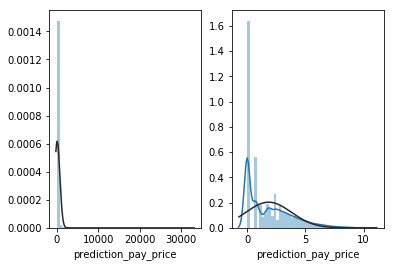

In [175]:
plt.subplot(1,2,1)
sns.distplot(train_7pay.prediction_pay_price,kde=False,fit=norm)

plt.subplot(122)
sns.distplot(np.log(train_7pay.prediction_pay_price),kde=True,fit=norm)
plt.show()

In [176]:
# train_7pay['prediction_pay_price']=np.log(train_7pay.prediction_pay_price)

In [177]:
train_7pay.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41439 entries, 25 to 2287984
Columns: 108 entries, user_id to prediction_pay_price
dtypes: float32(13), uint16(8), uint32(21), uint8(66)
memory usage: 8.9 MB


In [178]:
train_7pay_y=train_7pay.prediction_pay_price
train_7pay_X=train_7pay.drop(labels=['prediction_pay_price','user_id'],axis=1)
train_7pay_user_id=train_7pay.user_id
test_7pay_X=test_7pay.drop(labels=['user_id'],axis=1)
test_7pay_user_id=test_7pay.user_id



In [179]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [180]:
numeric_dtypes=['uint8','uint16','uint32','uint64','float32']
numeric2=[]
for i in train_7pay_X.columns:
    if (train_7pay_X[i].dtype in numeric_dtypes) & ( i != 'user_id') :#& (i != 'prediction_pay_price'):
        numeric2.append(i)
len(numeric2)

numeric_dtypes=['uint8','uint16','uint32','uint64','float16','float32','float64']
numeric2=[]
for i in train_7pay_X.columns:
    if (train_7pay_X[i].dtype in numeric_dtypes) & ( i != 'user_id')  :#& (i != 'prediction_pay_price'):
        numeric2.append(i)
skew_train_7pay_X=train_7pay_X[numeric2].apply(lambda x:skew(x)).sort_values(ascending=False)
skews=pd.DataFrame({'skew':skew_train_7pay_X})
skews.head()

numeric_dtypes=['uint8','uint16','uint32','uint64','float16','float32','float64']
numeric22=[]
for i in test_7pay.columns:
    if (test_7pay[i].dtype in numeric_dtypes) & ( i != 'user_id') : #& (i != 'prediction_pay_price'):
        numeric22.append(i)
skew_test_7pay=test_7pay[numeric22].apply(lambda x:skew(x)).sort_values(ascending=False)
skews22=pd.DataFrame({'skew':skew_test_7pay})
skews22.head()

high_skew=skew_train_7pay_X[skew_train_7pay_X>0.5]
high_skew=high_skew
skew_index=high_skew.index

for i in skew_index:
    train_7pay[i]=boxcox1p(train_7pay[i],boxcox_normmax(train_7pay[i]+1))
skew_train_7pay2_X=train_7pay[numeric2].apply(lambda x:skew(x)).sort_values(ascending=False)
skew2=pd.DataFrame({'skew':skew_train_7pay2_X})
skew2.head()

high_skew22=skew_test_7pay[skew_test_7pay>0.5]
high_skew22=high_skew22
skew_index22=high_skew22.index

for i in skew_index22:
    test_7pay[i]=boxcox1p(test_7pay[i],boxcox_normmax(test_7pay[i]+1))
skew_test_7pay22=test_7pay[numeric22].apply(lambda x:skew(x)).sort_values(ascending=False)
skew22=pd.DataFrame({'skew':skew_test_7pay22})
skew22.head()









D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5616: RuntimeWarning: overflow encountered in multiply
  return np.sum(a*a, axis)


,skew
sr_rss_help_bonus_level,80.705226
sr_guest_troop_capacity_level,80.705226
sr_march_size_level,52.917479
sr_troop_attack_level,52.893436
sr_outpost_tier_4_level,49.402686


In [188]:
X=train_7pay_X
y=np.log1p(train_7pay_y)
X.replace([np.inf,-np.inf],np.nan,inplace=True)
X.fillna(0.0,inplace=True)
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

kfolds=KFold(n_splits=10,shuffle=False,random_state=13)


def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=kfolds))
    return rmse

lm = LinearRegression()

benchmark_model=make_pipeline(RobustScaler(),
                             lm).fit(X,y)

cv_rmse(benchmark_model).mean()

X=train_7pay_X
X['user_id']=train_7pay_user_id
y=np.log1p(train_7pay_y)#train_7pay_y_bp
X.replace([np.inf,-np.inf],np.nan,inplace=True)
X.fillna(0.0,inplace=True)

from sklearn.model_selection  import train_test_split
X1,val_X1,y1,val_y1=train_test_split(X,y,test_size=0.2,random_state=17)
X2=X1.drop(labels='user_id',axis=1)
val_X2=val_X1.drop(labels='user_id',axis=1)
X2_user_id=X1.user_id
val_X2_user_id=val_X1.user_id

kfolds2=KFold(n_splits=3,shuffle=True,random_state=29)

def cv_rmse2(model):
    rmse=np.sqrt(-cross_val_score(model,X2,y1,scoring='neg_mean_squared_error',cv=kfolds2))
    return rmse

r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]
ridge_model2=make_pipeline(RobustScaler(),
                         RidgeCV(alphas=r_alphas,cv=kfolds2)).fit(X2,y1)
cv_rmse2(ridge_model2).mean()

1.0022030936732138

In [189]:
def anti_boxcox(x,la):
    return np.power((la * x + 1),1/la)-1

In [190]:
r_pred=ridge_model2.predict(val_X2)
val_y1_org=np.expm1(val_y1)
r_pred_org=np.expm1(r_pred)

# val_y1_org=anti_boxcox(val_y1,lp)

from sklearn.metrics import mean_squared_error


# np.sqrt(mean_squared_error(val_y1_org,r_pred_org))



r_result=pd.DataFrame(list(zip(val_y1_org,r_pred_org)),columns=['val_y1','pred_y1'])

r_result['user_id']=val_X2_user_id.values

r_result.head()


,val_y1,pred_y1,user_id
0,46.880001,87.691955,2558880
1,6.970000,4.011997,1486362
2,0.990000,2.742729,243845
3,2.980000,4.767149,873606
4,22.940001,7.415014,733979


In [191]:
r_result[r_result.val_y1 > 3000].head()

,val_y1,pred_y1,user_id
432,5474.917969,245.325052,1483023
598,6405.980469,63.451364,2713572
707,4774.260254,634.271381,282568
803,3623.168701,83217.470263,2342067
951,7671.870117,2804.201178,923135


In [192]:
np.sqrt(mean_squared_error(val_y1_org,r_pred_org))

1160367094.6821048

In [187]:
np.power((np.power((r_result['val_y1'] - r_result['pred_y1']),2).sum() / r_result.shape[0]),1/2)

653502520.304153